## Project Name : Zomato - Restaurant Data Analysis
## Project Type : EDA

**Summary: This Exploratory Data Analysis project focuses on a restaurants data aiming to identify insights about customers preferences and restaurants performance with its key componants like Restaurant name, online ordering availability, table booking, rating, votes, approximate cost for two, and cuisine type.The main objective is to assess the relationship between ratings and customer engagement , how cost infuence ratings and votting patterns and also an impact of online booking and table booking on customer satisfaction.**

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset 
df = pd.read_csv("Zomato_data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
# handling datatype of 'rate' column 
df['rate'] = df['rate'].str.split('/').str[0].astype(float)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


We have changed the data type of `rate` column to float in order to perform calculations on this column

In [5]:
# checking for null values in data
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

There are no null values in our data

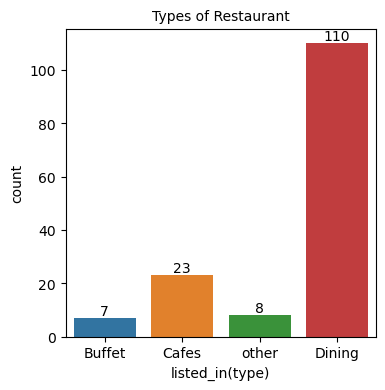

In [6]:
plt.figure(figsize=(4,4))
a=sns.countplot(data=df,x=df['listed_in(type)'])
a.bar_label(a.containers[0])
plt.title('Types of Restaurant',size=10)
plt.show()

Majority of orders are from Dinning restaurants

In [7]:
import warnings 
warnings.filterwarnings("ignore")


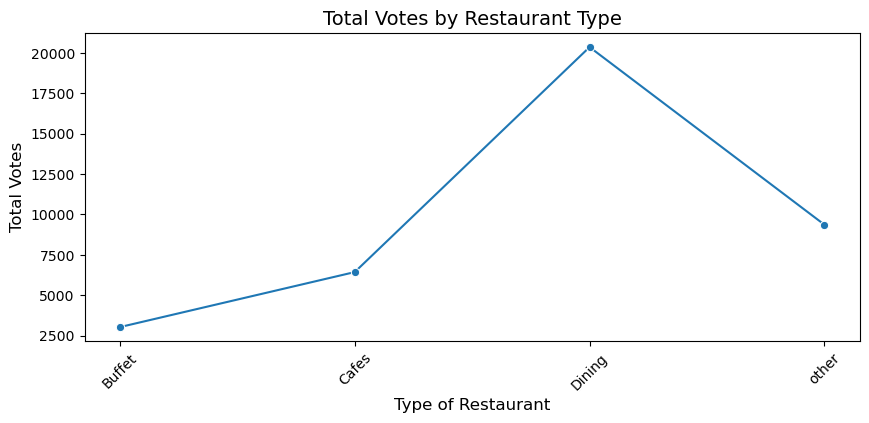

In [8]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=votes_by_type, x='listed_in(type)', y='votes', marker='o')

plt.title('Total Votes by Restaurant Type', size=14)
plt.xlabel('Type of Restaurant', size=12)
plt.ylabel('Total Votes', size=12)
plt.xticks(rotation=45)  
plt.show()

Dinning Restaurants have recieved maximum votes 

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


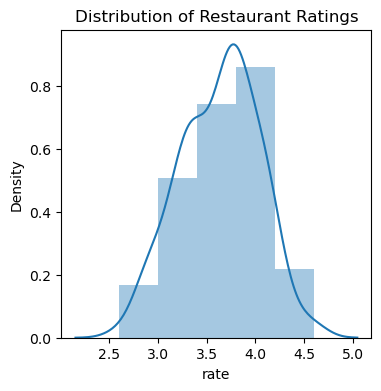

In [10]:
plt.figure(figsize=(4,4))
sns.distplot(df['rate'],bins=5)
plt.title("Distribution of Restaurant Ratings")
plt.show()

Maximum ratings received in the range of 3.5 to 4.5 

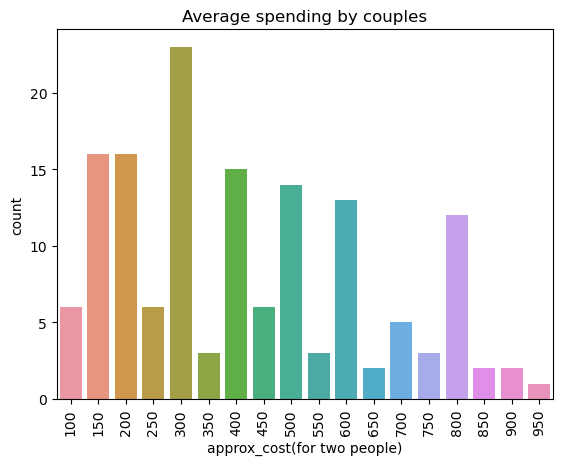

In [11]:
avg=df['approx_cost(for two people)']

plt.show()
sns.countplot(data=df, x=avg)
plt.title('Average spending by couples')
plt.xticks(rotation=90)
plt.show()

The couples prefer to spend around Rs.300 when the visit any restaurants

In [12]:
df['online_order']=df['online_order'].replace({'Yes':'Online','No':'Offline'})
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Online,Yes,4.1,775,800,Buffet
1,Spice Elephant,Online,No,4.1,787,800,Buffet
2,San Churro Cafe,Online,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,Offline,No,3.7,88,300,Buffet
4,Grand Village,Offline,No,3.8,166,600,Buffet


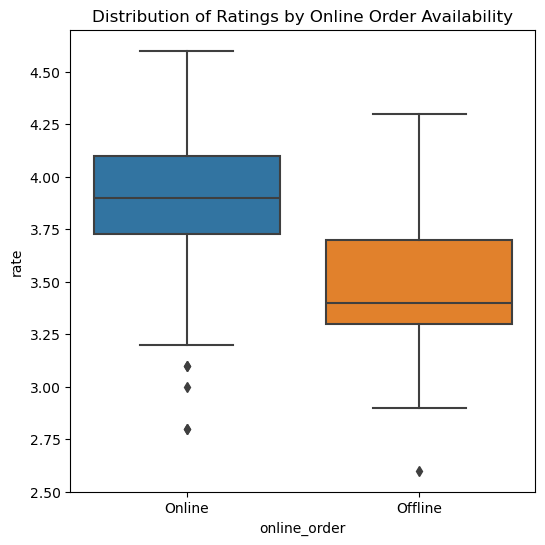

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='online_order',y='rate')
plt.title('Distribution of Ratings by Online Order Availability')
plt.show()

Online order received higher ratings than offline order

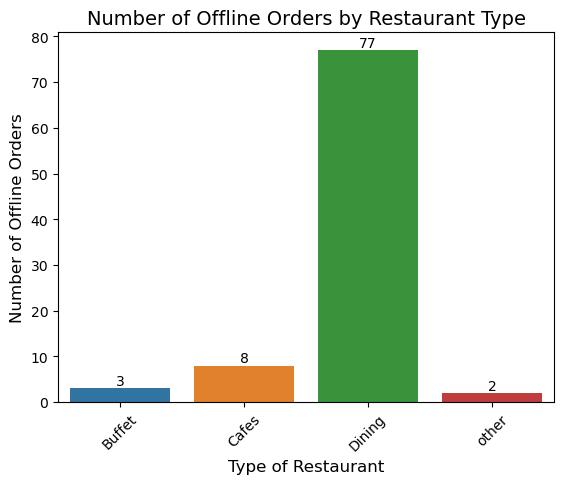

In [15]:
offline_count=df[df['online_order']=='Offline'].groupby('listed_in(type)').size().reset_index(name='Count')
a=sns.barplot(data=offline_count, x='listed_in(type)',y='Count')
a.bar_label(a.containers[0])
plt.title('Number of Offline Orders by Restaurant Type', size=14)
plt.xlabel('Type of Restaurant', size=12)
plt.ylabel('Number of Offline Orders', size=12)
plt.xticks(rotation=45)  
plt.show()

Dinning type of restaurants received more offline orders than any other type of restaurants

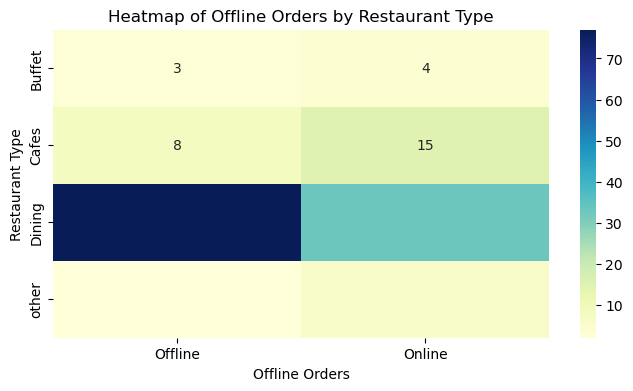

In [21]:
# we can visualise the above by heatmap also 

pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar=True)

# Add titles and labels
plt.title('Heatmap of Offline Orders by Restaurant Type')
plt.xlabel('Offline Orders')
plt.ylabel('Restaurant Type')
plt.show()

In Dinning type of restaurant offline orders are maximum booked compared to Online. Whereas, in buffet, cafes and other types of restaurants online orders are more booked than offline orders.